In [28]:
import os 
import signals, neuron, connectivity, simulation, visualization
import importlib;importlib.reload(neuron);
importlib.reload(connectivity);importlib.reload(simulation);importlib.reload(visualization)


import warnings
warnings.filterwarnings('ignore')
print('working in', os.getcwd())

working in /Users/xiaoqiansun/Desktop/AD钙奶/A_WorkStation/Simulation/Simulation/Version1


# Case 9

In [29]:
# necessary parameters

T = 100
dt = 0.1

# gE/I_bar to exc
gE2E_bar = 0.707
gI2E_bar = 1.768
# gE/I_bar to inh
gE2I_bar = 1.061
gI2I_bar = 1.768

Ne = 200
Ni = 200
N = Ne+Ni

maxns=1000


# customize any exc/inh attributes and create a list of neuron objects
exc_kwargs = {'externalInput':400}
inh_kwargs = {'tref':0.5, 'tau_m':15, 'externalInput':400}
neuornObj_list = [neuron.Neuron(T, dt, gE2E_bar, gI2E_bar, 0, **exc_kwargs) for i in range(Ne)]+\
                [neuron.Neuron(T, dt, gE2I_bar, gI2I_bar, 1, **inh_kwargs) for i in range(Ni)]
print(len(neuornObj_list), 'neuron objects in total\n'); print()


# connectivity attributes
cm_kwargs = {'p_inh2exc':0.25,
             'w_exc2exc':0.8, 'w_exc2inh':0.8, 'w_inh2exc':1.5, 'w_inh2inh':1.5}


# initialize simulator
simulator = simulation.Simulator(T, dt, N, Ne, Ni, maxns, neuornObj_list, **cm_kwargs)

simuResult = simulator.run(ifVerbose=True)

400 neuron objects in total


at time=0, neuron0 starts from V_init=-65.0
at time=1
  gE=0.0 | gI=0.0
  EPSP=0.0 | IPSP=-0.0 | Xcurr=40.0 | LeakC=-5.0
  dv = 0.175 | v_it = -64.825

at time=2
  gE=0.0 | gI=0.0
  EPSP=0.0 | IPSP=-0.0 | Xcurr=40.0 | LeakC=-5.175
  dv = 0.174 | v_it = -64.650875

at time=3
  gE=0.0 | gI=0.0
  EPSP=0.0 | IPSP=-0.0 | Xcurr=40.0 | LeakC=-5.349
  dv = 0.173 | v_it = -64.477620625

at time=4
  gE=0.0 | gI=0.0
  EPSP=0.0 | IPSP=-0.0 | Xcurr=40.0 | LeakC=-5.522
  dv = 0.172 | v_it = -64.305232521875

at time=5
  gE=0.0 | gI=0.0
  EPSP=0.0 | IPSP=-0.0 | Xcurr=40.0 | LeakC=-5.695
  dv = 0.172 | v_it = -64.13370635926562

at time=6
  gE=0.0 | gI=0.0
  EPSP=0.0 | IPSP=-0.0 | Xcurr=40.0 | LeakC=-5.866
  dv = 0.171 | v_it = -63.963037827469286

at time=7
  gE=0.0 | gI=0.0
  EPSP=0.0 | IPSP=-0.0 | Xcurr=40.0 | LeakC=-6.037
  dv = 0.17 | v_it = -63.79322263833194

at time=8
  gE=0.0 | gI=0.0
  EPSP=0.0 | IPSP=-0.0 | Xcurr=40.0 | LeakC=-6.207
  dv = 0.169 | v_it = -63.62

at time=69
  gE=0.0 | gI=0.0
  EPSP=0.0 | IPSP=-0.0 | Xcurr=40.0 | LeakC=-15.109
  dv = 0.124 | v_it = -54.766270715454326

at time=70
  gE=0.0 | gI=0.0
  EPSP=0.0 | IPSP=-0.0 | Xcurr=40.0 | LeakC=-15.234
  dv = 0.124 | v_it = -54.64243936187705

at time=71
  gE=0.0 | gI=0.0
  EPSP=0.0 | IPSP=-0.0 | Xcurr=40.0 | LeakC=-15.358
  dv = 0.123 | v_it = -54.51922716506767

at time=72
  gE=0.0 | gI=0.0
  EPSP=0.0 | IPSP=-0.0 | Xcurr=40.0 | LeakC=-15.481
  dv = 0.123 | v_it = -54.39663102924233

at time=73
  gE=0.0 | gI=0.0
  EPSP=0.0 | IPSP=-0.0 | Xcurr=40.0 | LeakC=-15.603
  dv = 0.122 | v_it = -54.27464787409612

at time=74
  gE=0.0 | gI=0.0
  EPSP=0.0 | IPSP=-0.0 | Xcurr=40.0 | LeakC=-15.725
  dv = 0.121 | v_it = -54.15327463472564

at time=75
  gE=0.0 | gI=0.0
  EPSP=0.0 | IPSP=-0.0 | Xcurr=40.0 | LeakC=-15.847
  dv = 0.121 | v_it = -54.03250826155201

at time=76
  gE=0.0 | gI=0.0
  EPSP=0.0 | IPSP=-0.0 | Xcurr=40.0 | LeakC=-15.967
  dv = 0.12 | v_it = -53.91234572024425

at time=77
  gE=

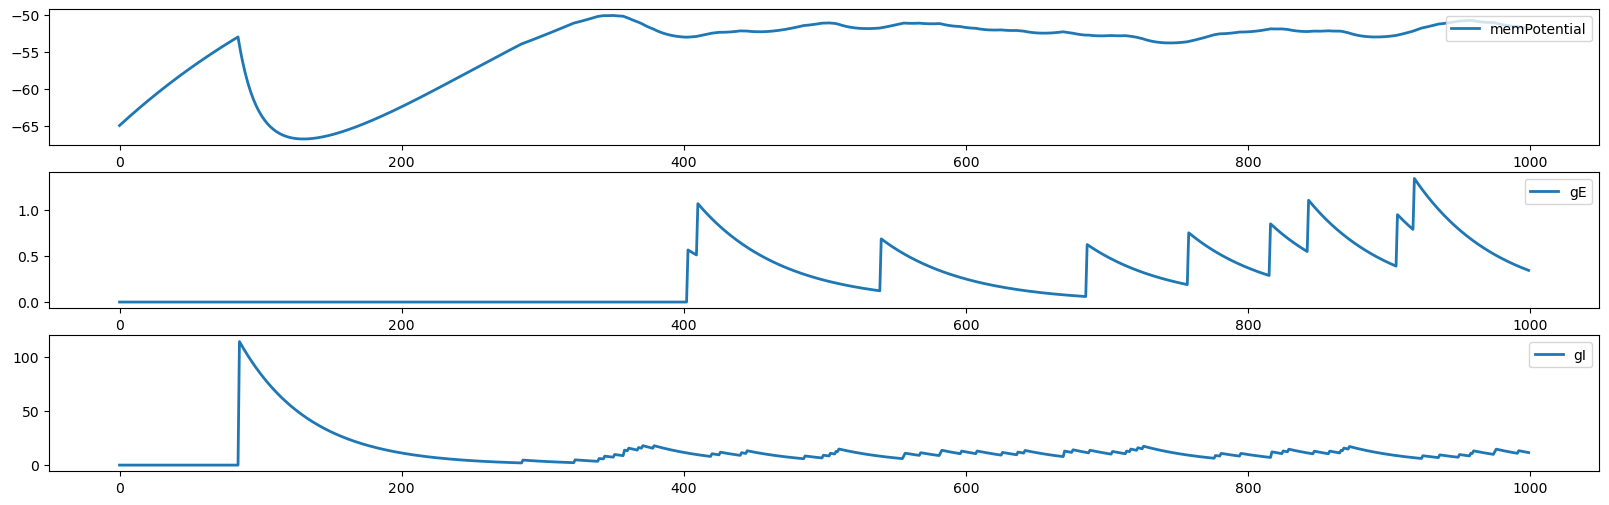

In [30]:
# print('The network generate spk:', simulator.get('netSpk'))
# visualization.plot_1Trace(simulator.neurons[0], 'memPotential')
visualization.plot_1NTraces(simulator.neurons[21], ['memPotential', 'gE', 'gI'])

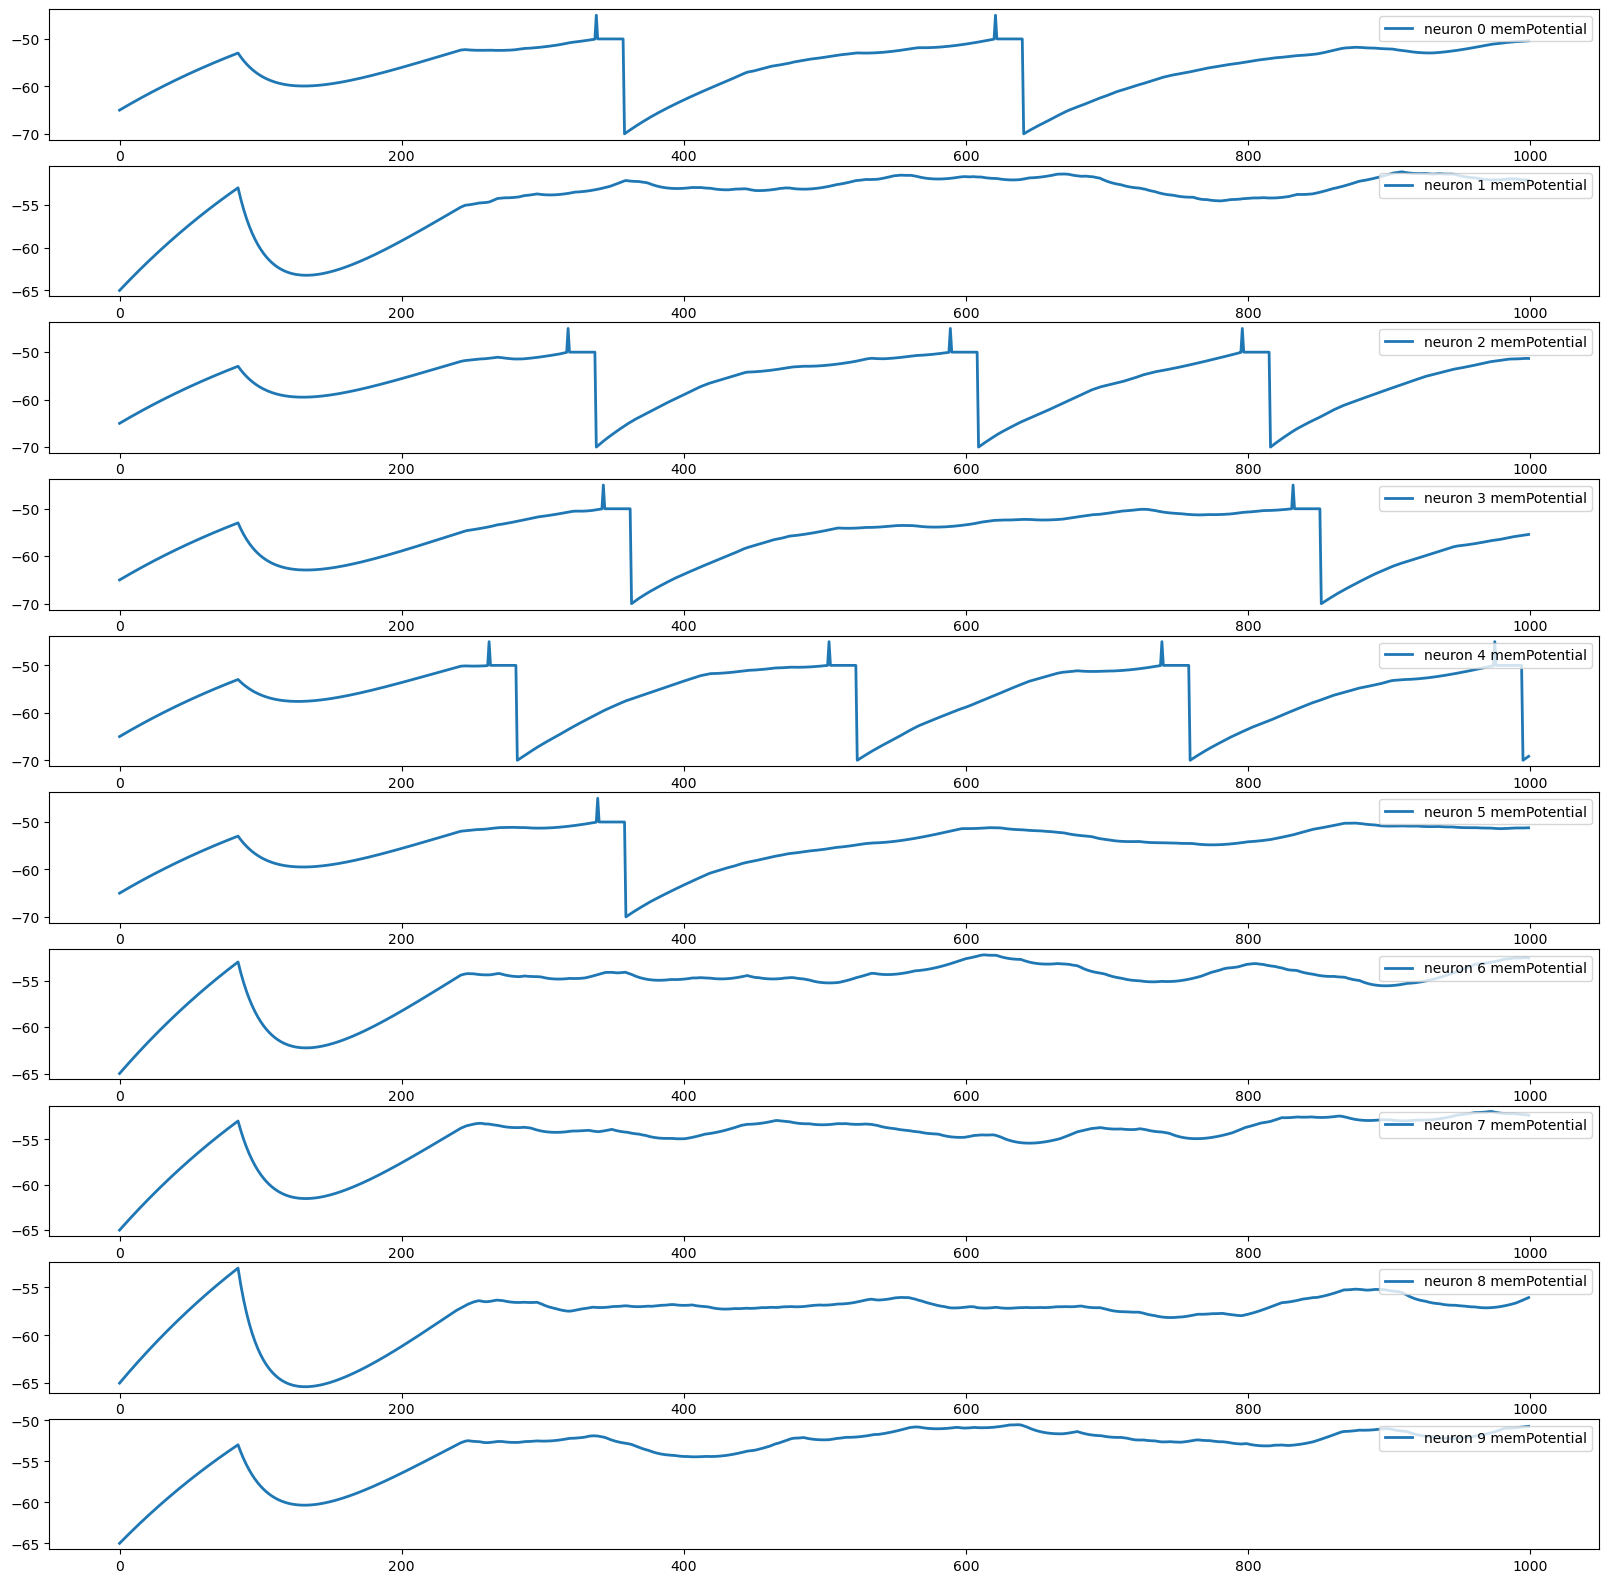

In [4]:
visualization.plot_NsTraces(simulator.neurons, 'memPotential', N=10)

In [31]:
# save the last simulator to pickle
savePath_1 = r'/Users/xiaoqiansun/Desktop/AD钙奶/A_WorkStation/Simulation/I_NeuronModel_Validation'

simulation.saveObj(simuResult, savePath=os.path.join(os.getcwd(), 'test_result'), saveFileName='N2000')


N2000simuObj saved in/Users/xiaoqiansun/Desktop/AD钙奶/A_WorkStation/Simulation/Simulation/Version1/test_result
